# **All Common Libraries Imports**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **All Scikit-Learn Imports**

In [49]:
from sklearn.datasets import load_wine
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA     # Dimensionality Reduction: PCA
from sklearn.cluster import KMeans        # Clustering: K-Means

# Regression metrics
from sklearn.metrics import mean_squared_error

# Classification metrics
from sklearn.metrics import accuracy_score

#**K-means**

In [18]:
import sklearn.cluster
dir(sklearn.cluster)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'FeatureAgglomeration',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hierarchical_fast',
 '_k_means_common',
 '_k_means_elkan',
 '_k_means_lloyd',
 '_k_means_minibatch',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'kmeans_plusplus',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

In [19]:
help(sklearn.cluster.KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

#**Loading data**

In [20]:
# Now, we need to divide the training data into differernt clusters
# and predict in which cluster a particular data point belongs.

# read the train and test dataset
train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/kmeans/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/kmeans/test.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (100, 5)
Shape of testing data : (100, 5)


#**Clustering Model Definition**

In [21]:
'''
Create the object of the K-Means model
You can also add other parameters and test your code here
Some parameters are : n_clusters and max_iter
Documentation of sklearn KMeans: 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
 '''

model = KMeans()  

# fit the model with the training data
model.fit(train_data)

# Number of Clusters
print('\nDefault number of Clusters : ',model.n_clusters)

# predict the clusters on the train dataset
predict_train = model.predict(train_data)
#print('\nCLusters on train data',predict_train) 

# predict the target on the test dataset
predict_test = model.predict(test_data)
#print('Clusters on test data',predict_test) 

# Now, we will train a model with n_cluster = 3
model_n3 = KMeans(n_clusters=3)

# fit the model with the training data
model_n3.fit(train_data)

# Number of Clusters
print('\nNumber of Clusters : ',model_n3.n_clusters)

# predict the clusters on the train dataset
predict_train_3 = model_n3.predict(train_data)
#print('\nCLusters on train data',predict_train_3) 

# predict the target on the test dataset
predict_test_3 = model_n3.predict(test_data)
#print('Clusters on test data',predict_test_3) 

print(predict_test_3)


Default number of Clusters :  8

Number of Clusters :  3
[2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 0 1 1 2 2 2 2 1 2 2 1 0 2 2 2 2 1 0
 0 2 1 1 2 2 1 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 0 2 2 2 0 2 1 0
 2 1 2 1 2 0 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 0 1]


# **Another K-Means Example from Random Data to Visualize Clusters**

# **All Globals**

In [26]:
NPOINTSPERCLUSTER = 200

#**Random Data Generation**

In [27]:
# Set three centers
center_1 = np.array([0,0])
center_2 = np.array([3,4])
center_3 = np.array([6,1])

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_2
data_3 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
print(data.shape)

data[0:10]

(600, 2)


array([[-0.33731743, -0.91929423],
       [ 0.784589  , -0.92315763],
       [-0.45176459,  0.21426374],
       [-0.53634059, -0.63372445],
       [ 0.03821704, -2.19516265],
       [ 2.39373196,  0.65478562],
       [ 0.06050538, -0.24588668],
       [-1.07272374, -1.18580214],
       [ 0.21590999, -1.01070002],
       [-0.04200475, -1.19378107]])

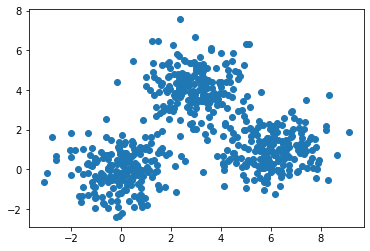

In [31]:
plt.scatter(data[:,0], data[:,1]); 

#**Clustering Model Definition and Training**

**K-Means Inertia:** Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [32]:
# define the model
model = KMeans(n_clusters = 3)

# fit the model on training data
model = model.fit(data)

# press tab to see available methods
#model. #press tab
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_) # sse

# compare to how data has been generated

[[ 6.0910823   0.9622504 ]
 [ 2.95197778  4.105284  ]
 [-0.03956101 -0.03513637]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0

#**Computing how good the cluster partition is:**

Remember SSE (Sum of Squared Error):
$$
SSE = \sum_{i=1}^N (x_i - C_{(X_i)})^2
$$
where $C_{(X_i)}$ represents the cluster centroid of $X_i$.

In [33]:
def sse(data, clusters, centroids):
    return np.sum(np.square(np.linalg.norm(data - centroids[clusters], axis=1)))

In [34]:
# check inertia is our sse defined function
abs(model.inertia_ - sse(data, model.labels_, model.cluster_centers_)) < 0.01

True

In [35]:
# apply the fitted model 
# if applied to the same data, we get model.labels_
clusters_sk = model.predict(data)

In [36]:
all(model.labels_ == clusters_sk)

True

In [37]:
clusters_sk

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

#**Clustering Output Visualization**

In [38]:
def plot_clustering(data, clusters, centroids = None):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)

    if centroids != None:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()

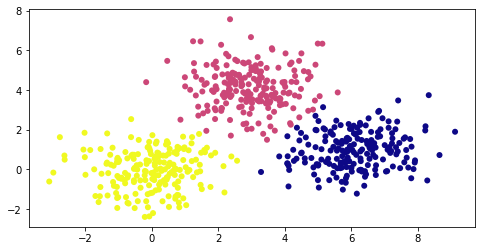

In [39]:
plot_clustering(data, clusters_sk)

# **PCA (Principle Component Analysis)**

For dimentionality reduction

# **Data Download for Regression and PCA**

In [22]:
# These datasets are used for following algorithms
# Linear regression

# read the train and test dataset
reg_train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/train.csv')
reg_test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/test.csv')

# shape of the dataset
print('\nShape of regression training data :', reg_train_data.shape)
print('\nShape of regression testing data :', reg_test_data.shape)


Shape of regression training data : (1364, 36)

Shape of regression testing data : (341, 36)


#**Regression Data Preparation**

In [23]:
# Now, we need to predict the missing target variable in the test data
# target variable - Item_Outlet_Sales
# seperate the independent and target variable on training data
reg_train_x = reg_train_data.drop(columns=['Item_Outlet_Sales'], axis=1)
reg_train_y = reg_train_data['Item_Outlet_Sales']

# seperate the independent and target variable on training data
reg_test_x = reg_test_data.drop(columns=['Item_Outlet_Sales'], axis=1)
reg_test_y = reg_test_data['Item_Outlet_Sales']

reg_train = pd.DataFrame(columns=['Train'])
reg_train['Train'] = reg_train_y

reg_test = pd.DataFrame(columns=['Test'])
reg_test['Test'] = reg_test_y

#**Regression Model Definition and Training**

In [24]:
print('\nTraining model with {} dimensions.'.format(reg_train_x.shape[1]))

# create object of model
model = LinearRegression()

# fit the model with the training data
model.fit(reg_train_x, reg_train_y)

# predict the target on the train dataset
predict_train = model.predict(reg_train_x)

# Accuray Score on train dataset
rmse_train = mean_squared_error(reg_train_y, predict_train)**(0.5)
print('\nRMSE on train dataset without PCA : ', rmse_train)

# predict the target on the test dataset
predict_test = model.predict(reg_test_x)

# Accuracy Score on test dataset
rmse_test = mean_squared_error(reg_test_y, predict_test)**(0.5)
print('\nRMSE on test dataset without PCA : ', rmse_test)



Training model with 35 dimensions.

RMSE on train dataset without PCA :  1135.8159344155247

RMSE on test dataset without PCA :  1009.2517232209715


#**Dimensionality Reduction Model Definition and Training**

In [25]:
# create the object of the PCA (Principal Component Analysis) model
# reduce the dimensions of the data to 10
'''
You can also add other parameters and test your code here
Some parameters are : svd_solver, iterated_power
Documentation of sklearn PCA:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
'''
model_pca = PCA(n_components=10)

new_train = model_pca.fit_transform(reg_train_x)
new_test  = model_pca.fit_transform(reg_test_x)

print('\nTraining model with {} dimensions.'.format(new_train.shape[1]))

# create object of model
model_new = LinearRegression()

# fit the model with the training data
model_new.fit(new_train,reg_train_y)

# predict the target on the new train dataset
predict_train_pca = model_new.predict(new_train)

# Accuray Score on train dataset
rmse_train_pca = mean_squared_error(reg_train_y,predict_train_pca)**(0.5)
print('\nRMSE on new train dataset using PCA : ', rmse_train_pca)

# predict the target on the new test dataset
predict_test_pca = model_new.predict(new_test)

# Accuracy Score on test dataset
rmse_test_pca = mean_squared_error(reg_test_y,predict_test_pca)**(0.5)
print('\nRMSE on new test dataset using PCA : ', rmse_test_pca)


Training model with 10 dimensions.

RMSE on new train dataset using PCA :  1198.2138992120288

RMSE on new test dataset using PCA :  1053.6979103405902


# **Another PCA to Visualize Dimensional Reduction**

In [44]:
wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [45]:
type(data)

pandas.core.frame.DataFrame

In [48]:
data.shape

(178, 13)

In [47]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#**Data Standardization**

**preprocessing.scale:** for better results in PCA it is better to Standardize a dataset (we can do along any axis with scikit-learn). This function center to the mean and component wise scale to unit variance.

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [51]:
data_norm = preprocessing.scale(data, axis=0)

# check
print(np.mean(data_norm, axis=0))
print(np.std(data_norm, axis=0))

[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [52]:
pca_model = PCA()
data_pca_sklearn = pca_model.fit_transform(data_norm)

In [53]:
print('Default number of components: {}'.format(pca_model.n_components_))
print(pca_model.explained_variance_)
print(pca_model.explained_variance_ratio_)
print(np.cumsum(pca_model.explained_variance_ratio_))

Default number of components: 13
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [59]:
pca_model = PCA(n_components = 2)
data_pca_sklearn = pca_model.fit_transform(data_norm)

print(pca_model.explained_variance_)
print(pca_model.explained_variance_ratio_)
print(np.cumsum(pca_model.explained_variance_ratio_))

[4.73243698 2.51108093]
[0.36198848 0.1920749 ]
[0.36198848 0.55406338]


In [60]:
print(data_pca_sklearn[0:2])

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]]


#**PCA Output Visualization**

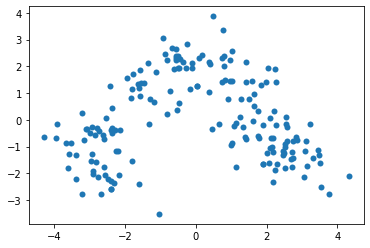

In [61]:
plt.scatter(data_pca_sklearn[:,0], data_pca_sklearn[:,1], cmap="plasma", linewidths=0);